#  ||  Internship @ The Sparks Foundation ||
## || Domain: Data Science and Business Analytics ||
## || Author: Akash Badgujar ||

### || Task : To predict the percentage of students based on no. of study hours using linear regression ||

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

### Reading and understanding the data

In [2]:
#reading the dataset

data = pd.read_csv("http://bit.ly/w-data")

Now let's get a feel of our dataset by displaying its first few rows

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape                   # to show the no, of rows and columns

(25, 2)

In [5]:
data.info()                  # to show indexes, columns, dtypes of each column, memory at once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see that there are 25 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 25 non-null entries)

In [6]:
data.isnull().sum()          # To show the count of Null values in each column

Hours     0
Scores    0
dtype: int64

### Visualising the Data

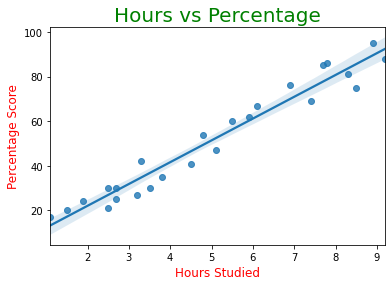

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
# visualizing the data

sns.regplot(x="Hours", y="Scores", data= data)

plt.title("Hours vs Percentage", fontdict={"fontsize": 20, "fontweight":5, "color":"green"})
plt.xlabel("Hours Studied", fontdict = {"fontsize":12, "fontweight":5, "color": "red"})
plt.ylabel("Percentage Score", fontdict = {"fontsize":12, "fontweight":5, "color": "red"})
plt.show()

print(data.corr())

As per the linear regression assumption, variable hours and scores display some sort of a linear relationship, otherwise, there is no use in fitting a linear model between them and It is confirmed that the variables are positively correlated.

<AxesSubplot:>

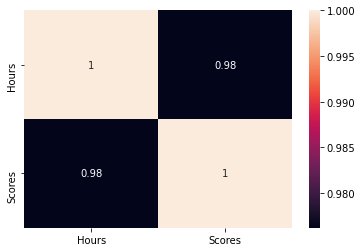

In [8]:
sns.heatmap(data.corr(), annot = True)

### Prepraring the data

In [9]:
#dividing the data into X and y

x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Train-Test Split

I will split the variable into training and testing sets by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in train dataset and the rest 20% in test dataset.

In [12]:
#splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size =0.8, random_state = 0)

In [13]:
x_train.shape

(20, 1)

In [14]:
x_test.shape

(5, 1)

In [15]:
y_train.shape

(20,)

In [16]:
y_test.shape

(5,)

### Building a Linear Model

Here `sklearn` is be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model.

In [17]:
## training the data

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as reg(Creating LinearRegression Object)

reg = LinearRegression()

# Fitting the model using lr.fit()

reg.fit(x_train, y_train)

print("Training complete.")

Training complete.


In [18]:
#testing the data

print("Training Accuracy:", reg.score(x_train, y_train))
print("Test Accuracy", reg.score(x_test, y_test))

Training Accuracy: 0.9515510725211552
Test Accuracy 0.9454906892105356


In [19]:
print("Coefficient = ", reg.coef_)
print("Intercept = ", reg.intercept_)

Coefficient =  [9.91065648]
Intercept =  2.018160041434683


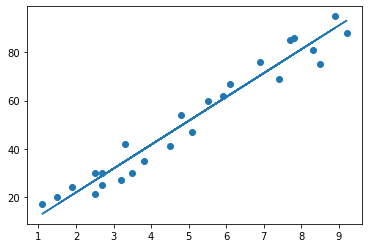

In [20]:
# plotting the regression line

line = reg.coef_ * x + reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

### Making the Prediction

In [21]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [22]:
#predicting the data

y_test_pred = reg.predict(x_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [23]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [24]:
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Scores': [k for k in y_test_pred]})
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### comparing the actual and predicted data

In [25]:

df = pd.DataFrame({"Actual":y_test, "Predicted":y_test_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation

In [26]:
#evaluating the performance of model

from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_pred, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [27]:
hours = 9.25
own_pred = reg.predict([[hours]])

print("Number of hours: {}".format(hours))
print("Predicted score: {}".format(own_pred[0]))

Number of hours: 9.25
Predicted score: 93.69173248737538


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.